# Q 2-4

In [39]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np3
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
import math
from numpy.linalg import inv
from numpy import random
np.random.seed(100)
from scipy.special import expit


def logistic (gamma):
    logistic = []
    for i in range(len(gamma)):
        logistic.append(1 / (1 + math.exp(-gamma[i])))
    return logistic
    
def omega_constructor(s):
    omega = []
    for i in range(len(s)):
        omega.append(s[i] * (1- s[i]))
    return np.diag(omega)
                
X = [[0.2, 3.1, 1],
     [1.0, 3.0, 1],
     [-0.2, 1.2, 1],
     [1.0, 1.1, 1]]
labels = [1, 1, 0, 0]
w0 = [-1, 1, 0]

#print(np.shape(X))
#S0
gamma = np.dot(X, w0)
s0 = expit(gamma)
print("s0: ", np.round(s0, 4))


#w1
omega0 = omega_constructor(s0)
#print(omega0)
XomegaX = np.dot(np.dot(np.transpose(X), omega0), X)
#print(XomegaX)
inverse_XomegaX = inv(XomegaX)
#print(inverse_XomegaX)
yS0 = np.subtract(labels, s0)
w1 = w0 + np.dot(np.dot(inverse_XomegaX, np.transpose(X)), yS0)
print("x1: ", np.round(w1, 4)) 

#s1
gamma1 = np.dot(X, w1)
s1 = logistic(gamma1)
print("s1: ", np.round(s1, 4))


#w2
omega1 = omega_constructor(s1)
#print(omega1)
XomegaX1 = np.dot(np.dot(np.transpose(X), omega1), X)
#print(XomegaX1)
inverse_XomegaX1 = inv(XomegaX1)
#print(inverse_XomegaX1)
yS1 = np.subtract(labels, s1)
w2 = w1 + np.dot(np.dot(inverse_XomegaX1, np.transpose(X)), yS1)
print("w2: ", np.round(w2, 4) ) 



s0:  [0.9478 0.8808 0.8022 0.525 ]
x1:  [ 1.3247  3.0499 -6.8291]
s1:  [0.9474 0.9746 0.0312 0.1044]
w2:  [ 1.366   4.1575 -9.1996]


# Q3 Wine Classification with logistic regression

In [4]:
from os.path import dirname, join as pjoin
import scipy.io as sio

mat_contents = sio.loadmat("data.mat")
print(sorted(mat_contents.keys()))

if __name__ == "__main__":
    for fields in ["X", "X_test", "y"]:
        print(fields, mat_contents[fields].shape)

X = mat_contents["X"]
y = mat_contents["y"]

['X', 'X_test', '__globals__', '__header__', '__version__', 'description', 'y']
X (5000, 12)
X_test (1000, 12)
y (5000, 1)


# Shuffle and Normalize

In [5]:
def splitList(portion1, portion2, a_List):
    total = portion1 + portion2
    length = len(a_List)
    num = int(portion1 * length / total)
    return np.array(a_List[:num]), np.array(a_List[num:])


combinedList = list(zip(X, y))
random.shuffle(combinedList)
X_shuffled, y_shuffled = zip(*combinedList)
X_training, X_validation = splitList(4,1, X_shuffled)
y_training, y_validation = splitList(4,1, y_shuffled)

#print(np.shape(X_training))
#print(np.shape(y_training))

mean_by_feature = np.mean(X_training, axis = 0)
std_by_feature = np.std(X_training, axis = 0)
"""
test = []
for i in range(12):
    num = 0;
    for j in range(len(X_training)):
        num += X_training[j][i]
    test.append(num / len(X_training))
"""
'''
print(test)
print(np.shape(mean_by_feature))
print(mean_by_feature)
print(np.shape(std_by_feature))
print(std_by_feature)
'''


X_training_demeaned = np.subtract(X_training, mean_by_feature)
X_training_normalized = X_training_demeaned / std_by_feature

X_validation_demeaned = np.subtract(X_validation, mean_by_feature)
X_validation_normalized = X_validation_demeaned / std_by_feature

'''
print(np.shape(X_training_normalized))
print(np.shape(X_validation_normalized))
print(np.mean(X_training_demeaned, axis = 0))
'''

'\nprint(np.shape(X_training_normalized))\nprint(np.shape(X_validation_normalized))\nprint(np.mean(X_training_demeaned, axis = 0))\n'

# Q 3-2 Batch Gradient Descent Code

[0.17270728 0.17270728 0.17270728 0.17270728 0.17270728 0.17270728
 0.17270728 0.17270728 0.17270728 0.17270728 0.17270728 0.17270728
 0.17270728]
    0 iterations have finished
 1000 iterations have finished
 2000 iterations have finished
 3000 iterations have finished
 4000 iterations have finished
 5000 iterations have finished
 6000 iterations have finished
final accuracy:  0.992


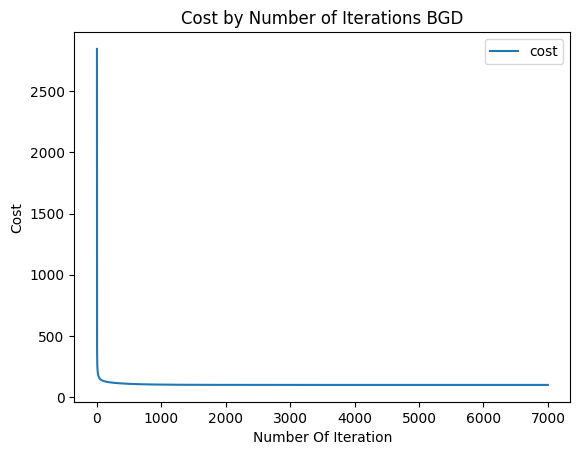

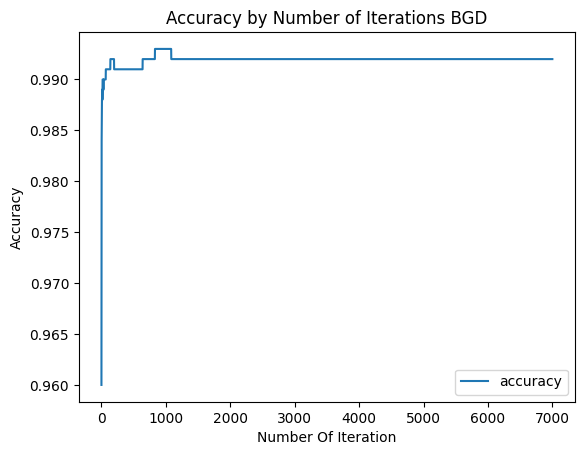

In [12]:
from scipy.special import expit, logit

def accuracy_score(labels, predictions, length):
    score = 0
    for i in range(length):
        if (labels[i] == predictions[i]):
            score += 1
            #print("test")
    return score / length
    
def cost_function_BGD (y, s, w, param):
    #print(np.dot(y, np.log(s)) + np.dot((1 - y), np.log(1 - s)))
    return -np.sum((np.dot(y, np.log(s)) + np.dot((1 - y), np.log(1 - s)))) + param * np.dot(np.transpose(w), w)

w = np.array([random.rand()] * 13)
print(w)
X_ficticious_training = []
X_ficticious_validation = []
for i in range (len(X_training_normalized)):
     X_ficticious_training.append(np.append(X_training_normalized[i], 1))

for i in range (len(X_validation_normalized)):
     X_ficticious_validation.append(np.append(X_validation_normalized[i], 1))
 
#print(X_ficticious[0])
#print(np.shape(X_ficticious_validation))

step_size = 0.001
regularization_param = 0.1
#w = np.array([0] * 13)
#print(len(w))
y_flatten_training = y_training.flatten()
y_flatten_validation = y_validation.flatten()
cost = []
accuracy = []  
test = []
for i in range(7000):
    prediction = []
    if (i % 1000 == 0):
        print(" %4i iterations have finished" %(i))
        #print(w)
    
    Xw = np.dot(X_ficticious_training, w)
    s = np.array(logistic(Xw))
    #print(np.shape(s))
    #print(np.shape(y_flatten_training - s))
    #print(np.shape(np.dot(-np.transpose(X_ficticious_training), (y_flatten_training - s))))
    error = step_size * (np.dot(-np.transpose(X_ficticious_training), (y_flatten_training - s)) + 2 * regularization_param * w)
    #print(error)
    w = np.subtract(w, error)
    cost.append(cost_function_BGD(y_flatten_training, s, w, regularization_param))
    for i in range(len(X_ficticious_validation)):
        if (np.dot(X_ficticious_validation[i], w) > 0):
            prediction.append(1)
        else : 
            prediction.append(0)
            
    accuracy.append(accuracy_score(y_flatten_validation, prediction, 1000))

test = w
print("final accuracy: ", accuracy[len(accuracy) - 1])
plt.plot(cost, label = "cost")
plt.title("Cost by Number of Iterations BGD")
plt.xlabel("Number Of Iteration")
plt.ylabel("Cost")
plt.legend()    
plt.show()

plt.plot(accuracy, label = "accuracy")
plt.title("Accuracy by Number of Iterations BGD")
plt.xlabel("Number Of Iteration")
plt.ylabel("Accuracy")
plt.legend()    
plt.show()

# Q3-4 Stochastic Gradient Descent Code

    0 iterations have finished
 1000 iterations have finished
 2000 iterations have finished
 3000 iterations have finished
final accuracy:  0.983


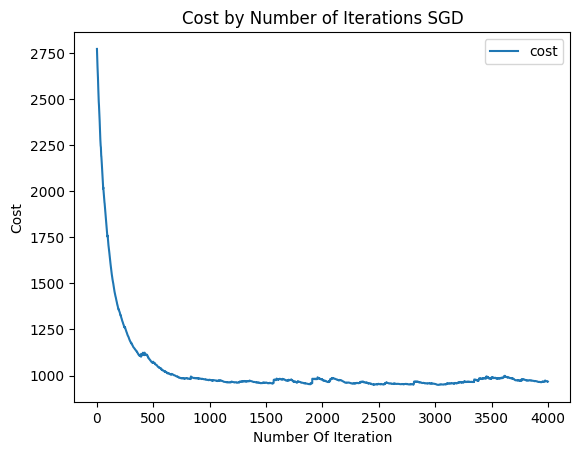

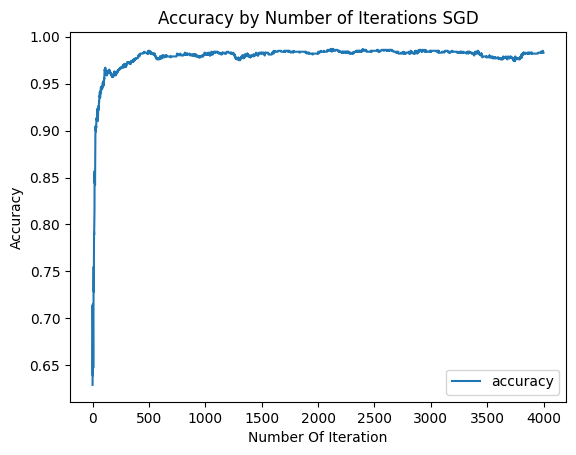

In [8]:
def cost_function_SGD (y, s, w, param):
    return -(np.dot(y, np.log(s)) + np.dot((1 - y), np.log(1 - s))) + param * np.dot(np.transpose(w), w)

step_size = 0.01
regularization_param = 0.1

w = np.array([0] * 13)
cost = []
accuracy = []
for i in range(4000):
    prediction = []
    if (i % 1000 == 0):
        print(" %4i iterations have finished" %(i))
        #print(w)
    
    Xw = np.dot(X_ficticious_training, w)
    s = expit(Xw)
    #print(np.shape(s))
    #print(np.shape(y_flatten_training))
    w = w - step_size * (-(y_flatten_training[i] - s[i]) * X_ficticious_training[i] + 2 * regularization_param * w)
    #print(w)
    cost.append(cost_function_SGD(y_flatten_training, s, w, regularization_param))

    for i in range(len(X_ficticious_validation)):
        if (np.dot(X_ficticious_validation[i], w) > 0):
            prediction.append(1)
        else : 
            prediction.append(0)
            
    accuracy.append(accuracy_score(y_flatten_validation, prediction, 1000))
        

print("final accuracy: ", accuracy[len(accuracy) - 1])
plt.plot(cost, label = "cost")
plt.title("Cost by Number of Iterations SGD")
plt.xlabel("Number Of Iteration")
plt.ylabel("Cost")
plt.legend()    
plt.show()

plt.plot(accuracy, label = "accuracy")
plt.title("Accuracy by Number of Iterations SGD")
plt.xlabel("Number Of Iteration")
plt.ylabel("Accuracy")
plt.legend()    
plt.show()

# Q3-5 SGD with changing step size

    0 iterations have finished
 1000 iterations have finished
 2000 iterations have finished
 3000 iterations have finished
final accuracy:  0.983


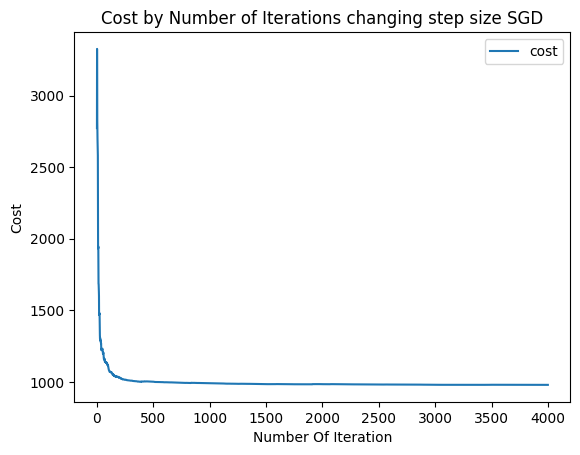

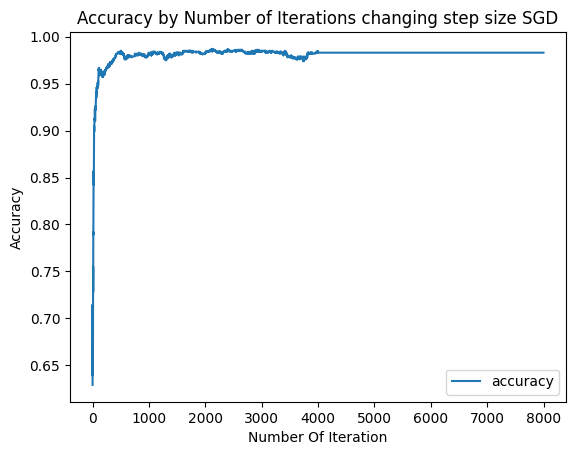

In [9]:

regularization_param = 0.1
delta = 1

w = np.array([0] * 13)
cost = []
for i in range(4000):
    if (i % 1000 == 0):
        print(" %4i iterations have finished" %(i))
        #print(w)
    
    Xw = np.dot(X_ficticious_training, w)
    s = expit(Xw)
    #print(np.shape(s))
    #print(np.shape(y_flatten_training))
    step_size = delta / (i + 1)
    w = w - step_size * (- (y_flatten_training[i] - s[i]) * X_ficticious_training[i] + 2 * regularization_param * w)
    #print(w)
    cost.append(cost_function_SGD(y_flatten_training, s, w, regularization_param))
    for i in range(len(X_ficticious_validation)):
        if (np.dot(X_ficticious_validation[i], w) > 0):
            prediction.append(1)
        else : 
            prediction.append(0)
            
    accuracy.append(accuracy_score(y_flatten_validation, prediction, 1000))

print("final accuracy: ", accuracy[len(accuracy) - 1])
plt.plot(cost, label = "cost")
plt.title("Cost by Number of Iterations changing step size SGD")
plt.xlabel("Number Of Iteration")
plt.ylabel("Cost")
plt.legend()    
plt.show()

plt.plot(accuracy, label = "accuracy")
plt.title("Accuracy by Number of Iterations changing step size SGD")
plt.xlabel("Number Of Iteration")
plt.ylabel("Accuracy")
plt.legend()    
plt.show()

# Q3-6 Kaggle

    0 iterations have finished
 1000 iterations have finished
 2000 iterations have finished
 3000 iterations have finished
 4000 iterations have finished
 5000 iterations have finished
 6000 iterations have finished
final weight [-1.01817659  1.11462065 -0.48057027 -4.70262777  0.6625246   1.02247391
 -2.85798795  6.97231867 -0.78021527  0.22968296  2.95374533  0.35191715
 -3.81281437]
(1000, 13)
(1000,)


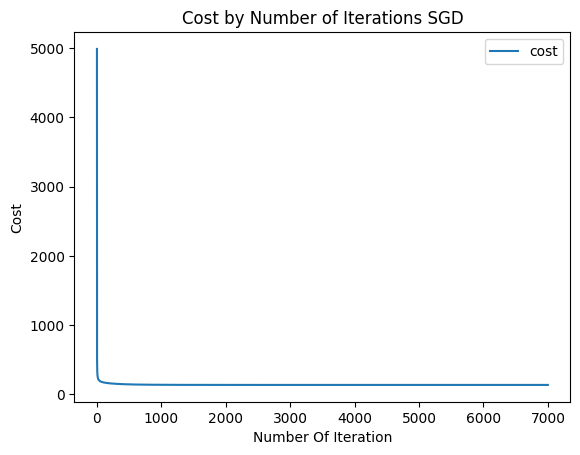

In [15]:
def array_to_csv (arr, filename):
    with open(filename, 'w') as file:
        file.write("Id,Category\n")
        for i, v in enumerate(arr):
            file.write(f'{i +1}, {v}\n')

combinedList = list(zip(X, y))
random.shuffle(combinedList)
X_shuffled, y_shuffled = zip(*combinedList)
Kaggle_data = mat_contents["X_test"]

#print(np.shape(X_shuffled))
#print(np.shape(y_shuffled))

mean_by_feature = np.mean(X_shuffled, axis = 0)
std_by_feature = np.std(X_shuffled, axis = 0)

#print(np.shape(mean_by_feature))
#print(np.shape(std_by_feature))

X_Kaggle = np.subtract(X_shuffled, mean_by_feature)
X_Kaggle_normalized = X_Kaggle / std_by_feature

test_Kaggle = np.subtract(Kaggle_data, mean_by_feature)
test_Kaggle_normalized = test_Kaggle / std_by_feature

w = np.array([random.rand()] * 13)
#print(w)
Kaggle_prediction = []
X_ficticious_Kaggle = []
Kaggle_fictitious_data = []
y_Kaggle = np.array(y_shuffled).flatten()
for i in range (len(X_Kaggle_normalized)):
     X_ficticious_Kaggle.append(np.append(X_Kaggle_normalized[i], 1))

for i in range (len(test_Kaggle_normalized)):
     Kaggle_fictitious_data.append(np.append(test_Kaggle_normalized[i], 1))

#print(np.shape(X_ficticious_Kaggle))
step_size = 0.001
regularization_param = 0.1
cost = []

for i in range(7000):
    prediction = []
    if (i % 1000 == 0):
        print(" %4i iterations have finished" %(i))

    
    Xw = np.dot(X_ficticious_Kaggle, w)
    s = np.array(logistic(Xw))
    error = step_size * (np.dot(-np.transpose(X_ficticious_Kaggle), (y_Kaggle - s)) + 2 * regularization_param * w)
    w = np.subtract(w, error)
    cost.append(cost_function_BGD(y_Kaggle, s, w, regularization_param))

print("final weight", w)


    
print(np.shape(Kaggle_fictitious_data))

for i in range(len(Kaggle_fictitious_data)):
    if (np.dot(Kaggle_fictitious_data[i], w) > 0):
        Kaggle_prediction.append(1)
    else : 
        Kaggle_prediction.append(0)
        
print(np.shape(Kaggle_prediction))
plt.plot(cost, label = "cost")
plt.title("Cost by Number of Iterations SGD")
plt.xlabel("Number Of Iteration")
plt.ylabel("Cost")
plt.legend()    
plt.show()

array_to_csv(Kaggle_prediction, "wine.csv")

# Q5-1

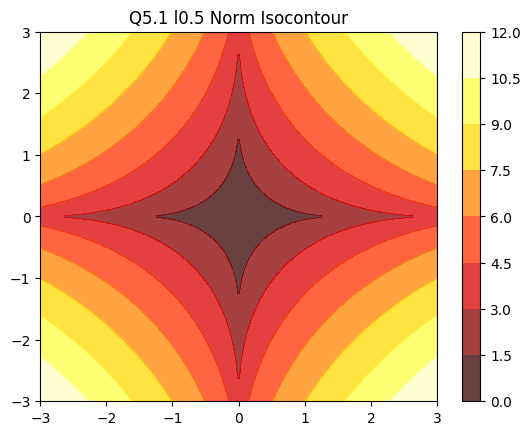

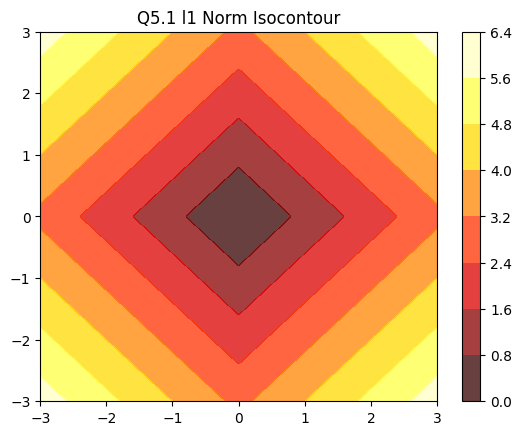

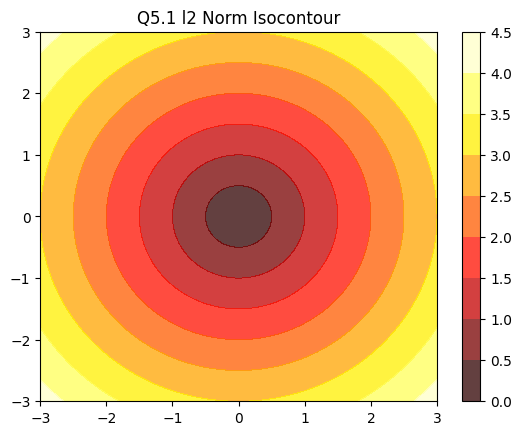

In [46]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


def l1norm(w1, w2):
    norm = []
    for i in range(len(w1)):
        norm.append(abs(w1[i]) + abs(w2[i]))
        
    return norm  

def l05norm(w1, w2):
    norm = []
    for i in range(len(w1)):
        sum = np.square((np.sqrt(abs(w1[i])) + np.sqrt(abs(w2[i]))))
        norm.append(sum)
        
    return norm 

def l2norm(w1, w2):
    norm = []
    for i in range(len(w1)):
        sum = np.sqrt((np.square(abs(w1[i])) + np.square(abs(w2[i])))) 
        norm.append(sum)
        
    return norm 
    
x = np.linspace(-3, 3, 256)
y = np.linspace(-3, 3, 256)
X, Y = np.meshgrid(x, y)


C = plt.contourf(X, Y, l05norm(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
cbar = plt.colorbar(C) 
plt.title("Q5.1 l0.5 Norm Isocontour")
plt.show()

C = plt.contourf(X, Y, l1norm(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
cbar = plt.colorbar(C) 
plt.title("Q5.1 l1 Norm Isocontour")
plt.show()

C =plt.contourf(X, Y, l2norm(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
cbar = plt.colorbar(C) 
plt.title("Q5.1 l2 Norm Isocontour")
plt.show()